1. Data Understanding and Exploration

In [1366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [1367]:
# reading the dataset

aus_house = pd.read_csv("train.csv")

aus_house_dup = aus_house

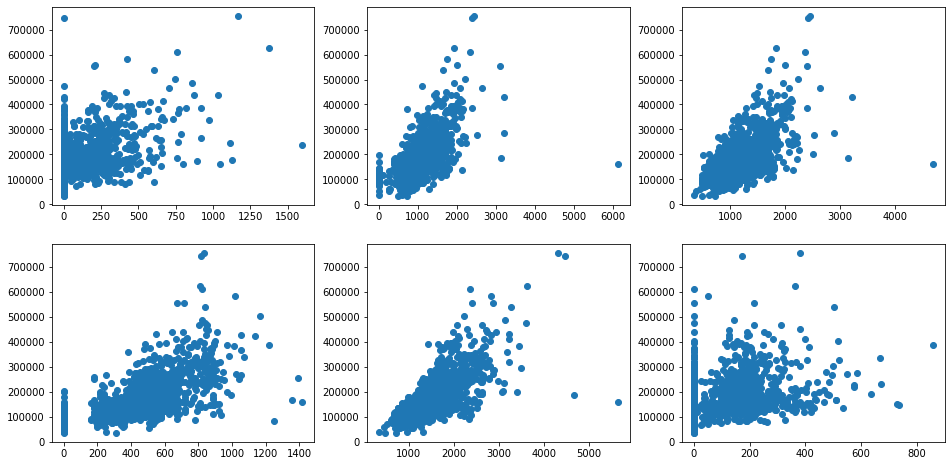

In [1368]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(aus_house.MasVnrArea,aus_house.SalePrice)
plt.subplot(2,3,2)
plt.scatter(aus_house.TotalBsmtSF,aus_house.SalePrice)
plt.subplot(2,3,3)
plt.scatter(aus_house['1stFlrSF'],aus_house.SalePrice)
plt.subplot(2,3,4)
plt.scatter(aus_house['GarageArea'],aus_house.SalePrice)
plt.subplot(2,3,5)
plt.scatter(aus_house['GrLivArea'],aus_house.SalePrice)
plt.subplot(2,3,6)
plt.scatter(aus_house['WoodDeckSF'],aus_house.SalePrice)

In [1369]:
aus_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1370]:
aus_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1371]:
aus_house.shape

(1460, 81)

In [1372]:
aus_house.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [1373]:
aus_house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Understanding the DataDictionary

In [1374]:
#MSSubClass : Identifies the type of dwelling involved in the sale
aus_house['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [1375]:
#MSZoning: Identifies the general zoning classification of the sale.
aus_house['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [1376]:
#Street: Type of road access to property
aus_house['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [1377]:
#Alley: Type of alley access to property
aus_house['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [19]:
#LotShape: General shape of property
aus_house['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [20]:
#LandContour: Flatness of the property
aus_house['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [21]:
#Utilities: Type of utilities available
aus_house['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [22]:
#LotConfig: Lot configuration
aus_house['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [23]:
#LandSlope: Slope of property
aus_house['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

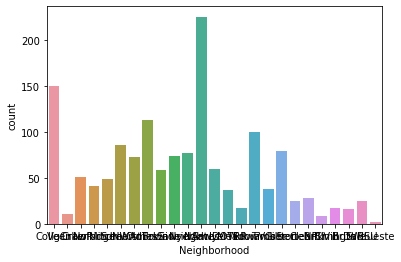

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [68]:
#Neighborhood: Physical locations within Ames city limits
#sns.distplot(aus_house['Neighborhood'])
sns.countplot(x ='Neighborhood', data = aus_house ) 
plt.show()
aus_house['Neighborhood'].value_counts()


In [25]:
#Condition1: Proximity to various conditions
aus_house['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [26]:
aus_house['Condition2'].value_counts()

Norm      1445
Feedr        6
PosN         2
Artery       2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

In [27]:
#BldgType: Type of dwelling
aus_house['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [34]:
#HouseStyle: Style of dwelling
aus_house['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

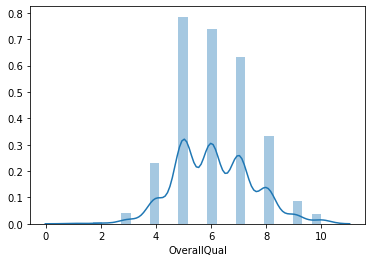

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [65]:
#OverallQual: Rates the overall material and finish of the house
sns.distplot(aus_house['OverallQual'])
plt.show()
aus_house['OverallQual'].value_counts()

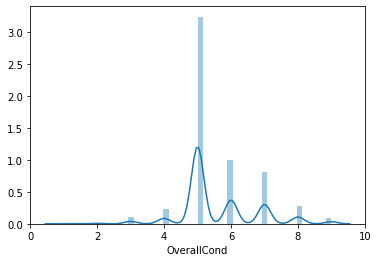

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [64]:
#OverallCond: Rates the overall condition of the house
sns.distplot(aus_house['OverallCond'])
plt.show()
aus_house['OverallCond'].value_counts()

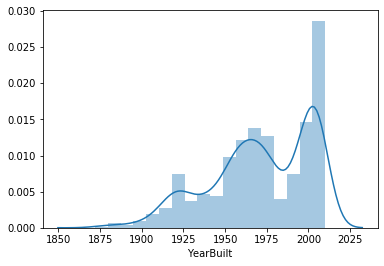

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

In [39]:
#YearBuilt: Original construction date
sns.distplot(aus_house['YearBuilt'])
plt.show()

aus_house['YearBuilt'].value_counts()

In [42]:
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

aus_house['YearRemodAdd'].value_counts()


1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

In [43]:
#RoofStyle: Type of roof
aus_house['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [44]:
#RoofMatl: Roof material
aus_house['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Roll          1
Metal         1
Name: RoofMatl, dtype: int64

In [48]:
#Exterior1st: Exterior covering on house
aus_house['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [47]:
#Exterior2nd: Exterior covering on house (if more than one material)
aus_house['Exterior2nd'].value_counts()


VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [49]:
#MasVnrType: Masonry veneer type
aus_house['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [51]:
#ExterQual: Evaluates the quality of the material on the exterior 
aus_house['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [52]:
#ExterCond: Evaluates the present condition of the material on the exterior
aus_house['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [53]:
#Foundation: Type of foundation
aus_house['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [54]:
#BsmtQual: Evaluates the height of the basement
aus_house['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [55]:
#BsmtCond: Evaluates the general condition of the basement
aus_house['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [56]:
#BsmtExposure: Refers to walkout or garden level walls
aus_house['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [57]:
#BsmtFinType1: Rating of basement finished area
aus_house['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [59]:
#BsmtFinType2: Rating of basement finished area (if multiple types)
aus_house['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [60]:
#Heating: Type of heating
aus_house['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [61]:
#HeatingQC: Heating quality and condition
aus_house['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [62]:
#CentralAir: Central air conditioning
aus_house['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [63]:
#Electrical: Electrical system
aus_house['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

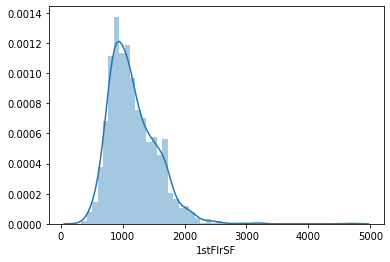

In [76]:
#1stFlrSF: First Floor square feet
sns.distplot(aus_house['1stFlrSF'],bins=50,kde=True)
plt.show()

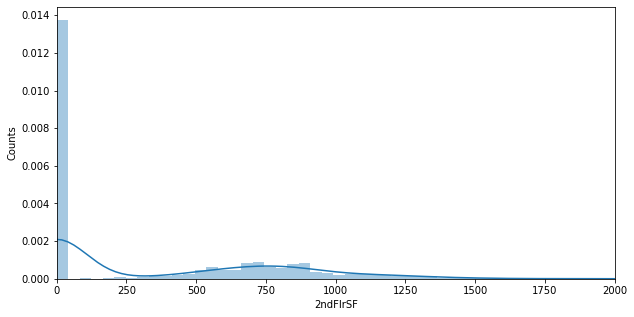

0       829
728      10
504       9
672       8
546       8
       ... 
788       1
1116      1
1112      1
1111      1
1872      1
Name: 2ndFlrSF, Length: 417, dtype: int64

In [77]:
#2ndFlrSF: Second floor square feet
plt.figure(figsize=(10,5))
plt.xlim(0,2000)
plt.xlabel('2ndFlrSF')
plt.ylabel('Counts')
sns.distplot(aus_house['2ndFlrSF'],bins=50,kde=True)
plt.show()

aus_house['2ndFlrSF'].value_counts()

In [84]:
#LowQualFinSF: Low quality finished square feet (all floors)
aus_house['LowQualFinSF'].value_counts()

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

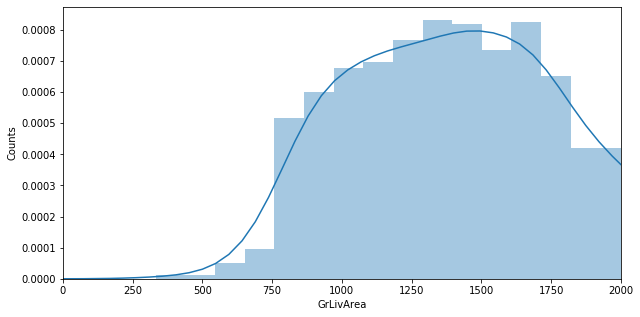

864     22
1040    14
894     11
848     10
1456    10
        ..
3447     1
1396     1
1395     1
1393     1
2054     1
Name: GrLivArea, Length: 861, dtype: int64

In [86]:
#GrLivArea: Above grade (ground) living area square feet
plt.figure(figsize=(10,5))
plt.xlim(0,2000)
plt.xlabel('GrLivArea')
plt.ylabel('Counts')
sns.distplot(aus_house['GrLivArea'],bins=50,kde=True)
plt.show()
aus_house['GrLivArea'].value_counts()

In [87]:
#BsmtFullBath: Basement full bathrooms
aus_house['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [88]:
#BsmtHalfBath: Basement half bathrooms
aus_house['BsmtHalfBath'].value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [89]:
#FullBath: Full bathrooms above grade
aus_house['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [90]:
#HalfBath: Half baths above grade
aus_house['HalfBath'].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [92]:
#Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
aus_house['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [93]:
#Kitchen: Kitchens above grade
aus_house['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [94]:
#KitchenQual: Kitchen quality
aus_house['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [95]:
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
aus_house['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

In [96]:
#Functional: Home functionality (Assume typical unless deductions are warranted)
aus_house['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [101]:
#Fireplaces: Number of fireplaces
aus_house['Fireplaces'].value_counts()


0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [102]:
#FireplaceQu: Fireplace quality
aus_house['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [103]:
#GarageType: Garage location
aus_house['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [104]:
#GarageYrBlt: Year garage was built
aus_house['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [105]:
#GarageFinish: Interior finish of the garage
aus_house['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [106]:
#GarageCars: Size of garage in car capacity
aus_house['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [107]:
#GarageArea: Size of garage in square feet
aus_house['GarageArea'].value_counts()

0       81
440     49
576     47
240     38
484     34
        ..
754      1
459      1
458      1
756      1
1418     1
Name: GarageArea, Length: 441, dtype: int64

In [108]:
#GarageQual: Garage quality
aus_house['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [109]:
#GarageCond: Garage condition
aus_house['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [110]:
#PavedDrive: Paved driveway
aus_house['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [111]:
#WoodDeckSF: Wood deck area in square feet
aus_house['WoodDeckSF'].value_counts()

0      761
192     38
100     36
144     33
120     31
      ... 
269      1
265      1
263      1
260      1
215      1
Name: WoodDeckSF, Length: 274, dtype: int64

In [113]:
#OpenPorchSF: Open porch area in square feet
aus_house['OpenPorchSF'].value_counts()

0      656
36      29
48      22
20      21
40      19
      ... 
159      1
156      1
148      1
142      1
119      1
Name: OpenPorchSF, Length: 202, dtype: int64

In [114]:
#EnclosedPorch: Enclosed porch area in square feet
aus_house['EnclosedPorch'].value_counts()

0      1252
112      15
96        6
120       5
144       5
       ... 
174       1
177       1
183       1
189       1
552       1
Name: EnclosedPorch, Length: 120, dtype: int64

In [115]:
#3SsnPorch: Three season porch area in square feet
aus_house['3SsnPorch'].value_counts()

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

In [116]:
#ScreenPorch: Screen porch area in square feet
aus_house['ScreenPorch'].value_counts()

0      1344
192       6
224       5
120       5
189       4
       ... 
182       1
440       1
178       1
312       1
480       1
Name: ScreenPorch, Length: 76, dtype: int64

In [117]:
#PoolArea: Pool area in square feet
aus_house['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [118]:
#PoolQC: Pool quality
aus_house['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [119]:
#Fence: Fence quality
aus_house['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [120]:
#MiscFeature: Miscellaneous feature not covered in other categories
aus_house['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [121]:
#MiscVal: $Value of miscellaneous feature
aus_house['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [122]:
#MoSold: Month Sold (MM)
aus_house['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [123]:
#YrSold: Year Sold (YYYY)
aus_house['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [125]:
#SaleType: Type of sale
aus_house['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [126]:
#SaleCondition: Condition of sale
aus_house['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

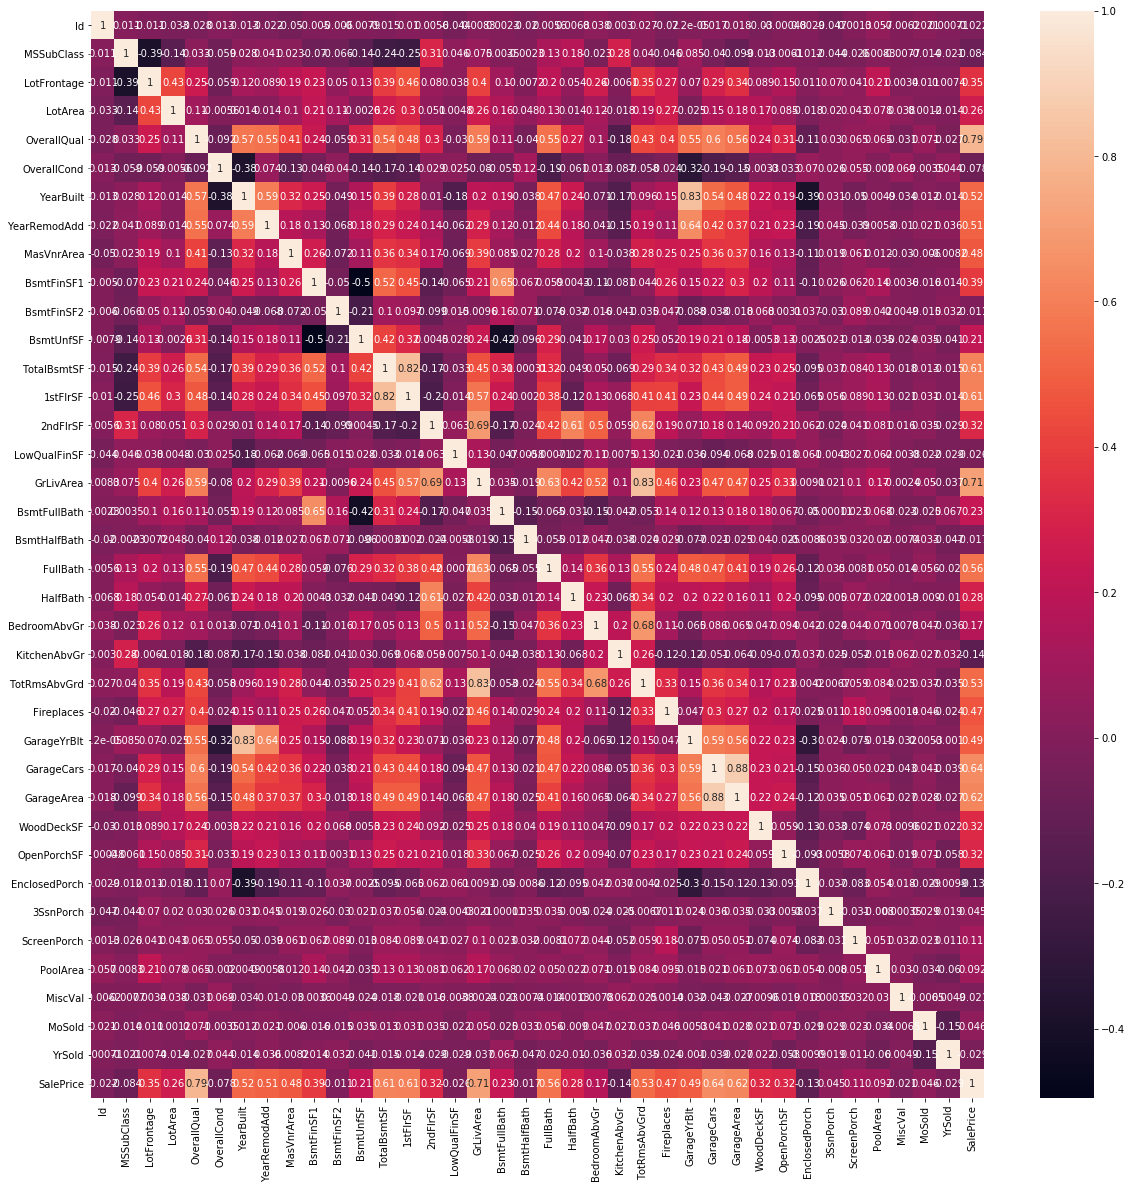

In [1378]:
#to check the coefficents of varaibles and can see there are many
plt.figure(figsize=(20,20))
sns.heatmap(aus_house[list(aus_house.dtypes[aus_house.dtypes!='object'].index)].corr(),annot=True)
plt.show()


# Data Preparation :
a. dropping unecessary columns
b. converting categorical to dummies

In [1379]:
# dropping ID column as it is not required for our analysis
aus_house.drop(['Id'], axis = 1,inplace=True)

In [1380]:
aus_house['MSSubClass']

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64

In [1381]:
# creating dummies for MSSubClass
aus_house = pd.get_dummies(aus_house,columns=['MSSubClass'],drop_first=True)

In [1382]:
# creating dummies for MSZoning
aus_house = pd.get_dummies(aus_house,columns=['MSZoning'],drop_first=True)

array([65., 80., 68., ..., 66., 68., 75.])

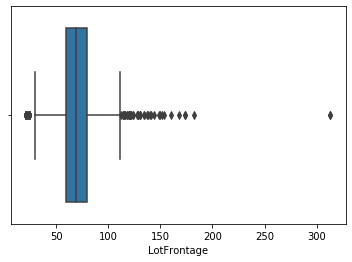

In [1383]:
# filling all null values in LotFrontage to mean value ( 70 ) , observed a outlier ( 313 )
aus_house['LotFrontage'].isnull().sum()
sns.boxplot(x=aus_house['LotFrontage'])
aus_house.shape

aus_house['LotFrontage'].values


In [1384]:
aus_house["LotFrontage"].fillna("70.0", inplace = True) 

In [1385]:
aus_house['LotFrontage']= aus_house['LotFrontage'].astype('float64')

In [1386]:
aus_house['LotFrontage'].describe()

count    1460.000000
mean       70.041096
std        22.024031
min        21.000000
25%        60.000000
50%        70.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [1387]:
aus_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 96 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LotFrontage     1460 non-null   float64
 1   LotArea         1460 non-null   int64  
 2   Street          1460 non-null   object 
 3   Alley           91 non-null     object 
 4   LotShape        1460 non-null   object 
 5   LandContour     1460 non-null   object 
 6   Utilities       1460 non-null   object 
 7   LotConfig       1460 non-null   object 
 8   LandSlope       1460 non-null   object 
 9   Neighborhood    1460 non-null   object 
 10  Condition1      1460 non-null   object 
 11  Condition2      1460 non-null   object 
 12  BldgType        1460 non-null   object 
 13  HouseStyle      1460 non-null   object 
 14  OverallQual     1460 non-null   int64  
 15  OverallCond     1460 non-null   int64  
 16  YearBuilt       1460 non-null   int64  
 17  YearRemodAdd    1460 non-null   i

In [1388]:
# converting Alley to dummies , no need to use drop_first , 
# as there are three values and dropping explicitly "no alley access column"
aus_house['Alley'].isnull().sum()

1369

In [1389]:
aus_house["Alley"].fillna("No alley access", inplace = True) 

In [1390]:
aus_house = pd.get_dummies(aus_house,columns=['Alley'])

In [1391]:
aus_house.drop(['Alley_No alley access'], axis = 1,inplace=True)

In [1392]:
# converting LotShape to dummies

aus_house = pd.get_dummies(aus_house,columns=['LotShape'],drop_first=True)

In [1393]:
aus_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 99 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LotFrontage     1460 non-null   float64
 1   LotArea         1460 non-null   int64  
 2   Street          1460 non-null   object 
 3   LandContour     1460 non-null   object 
 4   Utilities       1460 non-null   object 
 5   LotConfig       1460 non-null   object 
 6   LandSlope       1460 non-null   object 
 7   Neighborhood    1460 non-null   object 
 8   Condition1      1460 non-null   object 
 9   Condition2      1460 non-null   object 
 10  BldgType        1460 non-null   object 
 11  HouseStyle      1460 non-null   object 
 12  OverallQual     1460 non-null   int64  
 13  OverallCond     1460 non-null   int64  
 14  YearBuilt       1460 non-null   int64  
 15  YearRemodAdd    1460 non-null   int64  
 16  RoofStyle       1460 non-null   object 
 17  RoofMatl        1460 non-null   o

In [1394]:
# converting Street to dummies
aus_house = pd.get_dummies(aus_house,columns=['Street'],drop_first=True)

In [1395]:
aus_house.columns

Index(['LotFrontage', 'LotArea', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', '

In [1396]:
aus_house.shape

(1460, 99)

In [1397]:
# converting LandContour to dummies
aus_house = pd.get_dummies(aus_house,columns=['LandContour'],drop_first=True)

In [1398]:
# converting Utilities to dummies , and drop first
# aus_house['Utilities'].isnull().sum()
aus_house = pd.get_dummies(aus_house,columns=['Utilities'],drop_first=True)

In [1399]:
# converting LotConfig to dummies , and drop first
# aus_house['LotConfig'].isnull().sum()
aus_house = pd.get_dummies(aus_house,columns=['LotConfig'],drop_first=True)

In [1400]:
# converting LandSlope to dummies
# aus_house['LandSlope'].isnull().sum()
aus_house = pd.get_dummies(aus_house,columns=['LandSlope'],drop_first=True)

In [1401]:
# converting Neighborhood to dummies , not using drop_first as all columns are important

# aus_house['Neighborhood'].isnull().sum()

aus_house = pd.get_dummies(aus_house,columns=['Neighborhood'],drop_first=True)

In [1402]:
# converting Condition1 to dummies
aus_house = pd.get_dummies(aus_house,columns=['Condition1'],drop_first=True)

In [1403]:
# converting Condition2 to dummies

aus_house = pd.get_dummies(aus_house,columns=['Condition2'],drop_first=True)

In [1404]:
# converting BldgType to dummies

aus_house = pd.get_dummies(aus_house,columns=['BldgType'],drop_first=True)

In [1405]:
# converting HouseStyle to dummies
aus_house = pd.get_dummies(aus_house,columns=['HouseStyle'],drop_first=True)

In [1406]:
# converting OverallQual to dummies
aus_house = pd.get_dummies(aus_house,columns=['OverallQual'],drop_first=True)

In [1407]:
# converting OverallCond to dummies
aus_house = pd.get_dummies(aus_house,columns=['OverallCond'],drop_first=True)

In [1408]:
# checking YearBuilt for any null values
aus_house['YearBuilt'].isnull().sum()

0

In [1409]:
# checking YearRemodAdd for any null values
aus_house['YearRemodAdd'].isnull().sum()

0

In [1410]:
# converting RoofStyle to dummies
aus_house = pd.get_dummies(aus_house,columns=['RoofStyle'],drop_first=True)

In [1411]:
# converting RoofMatl to dummies
aus_house = pd.get_dummies(aus_house,columns=['RoofMatl'],drop_first=True)

In [1412]:
# converting Exterior1st to dummies
aus_house = pd.get_dummies(aus_house,columns=['Exterior1st'],drop_first=True)

In [1413]:
# converting Exterior2nd to dummies
aus_house = pd.get_dummies(aus_house,columns=['Exterior2nd'],drop_first=True)

In [1414]:
# converting MasVnrType to dummies
aus_house['MasVnrType'].isnull().sum()

8

In [1415]:
aus_house['MasVnrType'].value_counts().idxmax()

'None'

In [1416]:
aus_house['MasVnrType'].fillna('None', inplace = True) 

In [1417]:
aus_house = pd.get_dummies(aus_house,columns=['MasVnrType'],drop_first=True)

In [1418]:
# checking for null values in MasVnrArea , and filling it up with mean value

aus_house['MasVnrArea'].isnull().sum()

8

In [1419]:
aus_house['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [1420]:
aus_house["MasVnrArea"].fillna(float('103.00'), inplace = True)

In [1421]:
# converting ExterQual to dummies

aus_house = pd.get_dummies(aus_house,columns=['ExterQual'],drop_first=True)

In [1422]:
# converting ExterCond to dummies

aus_house = pd.get_dummies(aus_house,columns=['ExterCond'],drop_first=True)

In [1423]:
# converting Foundation to dummies

aus_house['Foundation'].isnull().sum()
aus_house = pd.get_dummies(aus_house,columns=['Foundation'],drop_first=True)

In [1424]:
# converting BsmtQual to dummies

aus_house['BsmtQual'].isnull().sum()

37

In [1425]:
aus_house['BsmtQual'].value_counts().idxmax()

'TA'

In [1426]:
aus_house['BsmtQual'].fillna('TA', inplace = True) 

In [1427]:
aus_house = pd.get_dummies(aus_house,columns=['BsmtQual'],drop_first=True)

In [1428]:
aus_house.shape

(1460, 215)

In [1429]:
# converting BsmtCond to dummies

aus_house['BsmtCond'].isnull().sum()

37

In [1430]:
aus_house['BsmtCond'].value_counts().idxmax()

'TA'

In [1431]:
aus_house['BsmtCond'].fillna('TA', inplace = True) 

In [1432]:
aus_house = pd.get_dummies(aus_house,columns=['BsmtCond'],drop_first=True)

In [1433]:
# converting BsmtExposure to dummies
aus_house['BsmtExposure'].isnull().sum()

38

In [1434]:
aus_house['BsmtExposure'].value_counts().idxmax()

'No'

In [1435]:
aus_house['BsmtExposure'].fillna('No', inplace = True)

In [1436]:
aus_house = pd.get_dummies(aus_house,columns=['BsmtExposure'],drop_first=True)

In [1437]:
# converting BsmtFinType1 to dummies

aus_house['BsmtFinType1'].isnull().sum()

37

In [1438]:
aus_house['BsmtFinType1'].value_counts().idxmax()

'Unf'

In [1439]:
aus_house['BsmtFinType1'].fillna('Unf', inplace = True)

In [1440]:
aus_house = pd.get_dummies(aus_house,columns=['BsmtFinType1'],drop_first=True)

In [1441]:
# checking for null in BsmtFinSF1

aus_house['BsmtFinSF1'].isnull().sum()

0

In [1442]:
# converting BsmtFinType2 to dummies

aus_house['BsmtFinType2'].isnull().sum()

38

In [1443]:
aus_house['BsmtFinType2'].value_counts().idxmax()

'Unf'

In [1444]:
aus_house['BsmtFinType2'].fillna('Unf', inplace = True)

In [1445]:
aus_house = pd.get_dummies(aus_house,columns=['BsmtFinType2'],drop_first=True)

In [1446]:
aus_house.shape

(1460, 227)

In [1447]:
# checking for null values in BsmtFinSF2
aus_house['BsmtFinSF2'].isnull().sum()

0

In [1448]:
# checking for nul values in BsmtUnfSF
aus_house['BsmtUnfSF'].isnull().sum()

0

In [1449]:
# checking for null values in TotalBsmtSF
aus_house['TotalBsmtSF'].isnull().sum()

0

In [1450]:
# converting Heating into dummies
aus_house = pd.get_dummies(aus_house,columns=['Heating'],drop_first=True)

In [1451]:
# converting HeatingQC to dummies
aus_house = pd.get_dummies(aus_house,columns=['HeatingQC'],drop_first=True)

In [1452]:
# converting CentralAir to dummies
aus_house = pd.get_dummies(aus_house,columns=['CentralAir'],drop_first=True)

In [1453]:
# converting Electrical to dummies
aus_house['Electrical'].isnull().sum()

1

In [1454]:
aus_house['Electrical'].value_counts().idxmax()

'SBrkr'

In [1455]:
aus_house['Electrical'].fillna('SBrkr', inplace = True)

In [1456]:
aus_house = pd.get_dummies(aus_house,columns=['Electrical'],drop_first=True)

In [1457]:
# checkign for null values in 1stFlrSF
aus_house['1stFlrSF'].isnull().sum()

0

In [1458]:
# checkign for null values 2ndFlrSF 
aus_house['2ndFlrSF'].isnull().sum()

0

In [1459]:
# checking for null values in LowQualFinSF
aus_house['LowQualFinSF'].isnull().sum()

0

In [1460]:
# checking for null values in GrLivArea
aus_house['GrLivArea'].isnull().sum()

0

In [1461]:
# converting BsmtFullBath to dummies
aus_house = pd.get_dummies(aus_house,columns=['BsmtFullBath'],drop_first=True)

In [1462]:
# convertign BsmtHalfBath to dummies
aus_house = pd.get_dummies(aus_house,columns=['BsmtHalfBath'],drop_first=True)

In [1463]:
# converting FullBath to dummies
aus_house = pd.get_dummies(aus_house,columns=['FullBath'],drop_first=True)

In [1464]:
# converting HalfBath to dummies
aus_house = pd.get_dummies(aus_house,columns=['HalfBath'],drop_first=True)

In [1465]:
# converting Bedroom to dummies
aus_house = pd.get_dummies(aus_house,columns=['BedroomAbvGr'],drop_first=True)

In [1466]:
# converting Kitchen to dummies

#aus_house['KitchenAbvGr'].isnull().sum()
#aus_house['KitchenAbvGr'].value_counts()
aus_house = pd.get_dummies(aus_house,columns=['KitchenAbvGr'],drop_first=True)

In [1467]:
# converting KitchenQual to dummies
aus_house = pd.get_dummies(aus_house,columns=['KitchenQual'],drop_first=True)

In [1468]:
# converting TotRmsAbvGrd to dummies
aus_house = pd.get_dummies(aus_house,columns=['TotRmsAbvGrd'],drop_first=True)

In [1469]:
# converting Functional to dummies
aus_house = pd.get_dummies(aus_house,columns=['Functional'],drop_first=True)

In [1470]:
# converting Fireplaces to dummies
aus_house = pd.get_dummies(aus_house,columns=['Fireplaces'],drop_first=True)

In [1471]:
# converting FireplaceQu to dummies
aus_house['FireplaceQu'].isnull().sum()

690

In [1472]:
aus_house['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [1473]:
aus_house['FireplaceQu'].value_counts().idxmax()

'Gd'

In [1474]:
aus_house['FireplaceQu'].fillna('Gd', inplace = True)

In [1475]:
aus_house = pd.get_dummies(aus_house,columns=['FireplaceQu'],drop_first=True)

In [1476]:
# converting GarageType to dummies
aus_house['GarageType'].value_counts().idxmax()

'Attchd'

In [1477]:
aus_house['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [1478]:
aus_house['GarageType'].fillna('Attchd', inplace = True)

In [1479]:
aus_house = pd.get_dummies(aus_house,columns=['GarageType'],drop_first=True)

In [1480]:
# checking for null values in GarageYrBlt
aus_house['GarageYrBlt'].isnull().sum()

81

In [1481]:
aus_house['GarageYrBlt'].value_counts().idxmax()

2005.0

In [1482]:
aus_house['GarageYrBlt'].fillna(float('2005.0'), inplace = True)

In [1483]:
# converting GarageFinish to dummies
aus_house.shape

aus_house['GarageFinish'].isnull().sum()


81

In [1484]:
aus_house['GarageFinish'].value_counts().idxmax()

'Unf'

In [1485]:
aus_house['GarageFinish'].fillna('Unf', inplace = True)

In [1486]:
aus_house = pd.get_dummies(aus_house,columns=['GarageFinish'],drop_first=True)

In [1487]:
# converting GarageCars into dummies
aus_house = pd.get_dummies(aus_house,columns=['GarageCars'],drop_first=True)

In [1488]:
aus_house.shape

(1460, 281)

In [1489]:
# checking for null values in GarageArea

aus_house['GarageArea'].isnull().sum()

0

In [1490]:
# converting GarageQual into categorical
#aus_house.shape
aus_house['GarageQual'].isnull().sum()

81

In [1491]:
aus_house['GarageQual'].value_counts().idxmax()

'TA'

In [1492]:
aus_house['GarageQual'].fillna('TA', inplace = True)

In [1493]:
aus_house = pd.get_dummies(aus_house,columns=['GarageQual'],drop_first=True)

In [1494]:
# converting GarageCond to dummies
aus_house['GarageCond'].isnull().sum()

81

In [1495]:
aus_house['GarageCond'].value_counts().idxmax()

'TA'

In [1496]:
aus_house['GarageCond'].fillna('TA', inplace = True)

In [1497]:
aus_house = pd.get_dummies(aus_house,columns=['GarageCond'],drop_first=True)

In [1498]:
# converting PavedDrive to dummies
aus_house = pd.get_dummies(aus_house,columns=['PavedDrive'],drop_first=True)

In [1499]:
# checking for nulls in WoodDeckSF
aus_house['WoodDeckSF'].isnull().sum()

0

In [1500]:
# checking for nulls in OpenPorchSF 
aus_house['OpenPorchSF'].isnull().sum()

0

In [1501]:
# checking for nulls in EnclosedPorch
aus_house['EnclosedPorch'].isnull().sum()

0

In [1502]:
# checking fro nulls in 3SsnPorch
aus_house['3SsnPorch'].isnull().sum()

0

In [1503]:
# checking for nulls in ScreenPorch
aus_house['ScreenPorch'].isnull().sum()

0

In [1504]:
# checkign for nulls in PoolArea
aus_house['PoolArea'].isnull().sum()

0

In [1505]:
# converting PoolQC to dummies
aus_house['PoolQC'].fillna('NoPool', inplace = True)

In [1506]:
aus_house = pd.get_dummies(aus_house,columns=['PoolQC'],drop_first=True)

In [1507]:
# converting Fence to dummies
aus_house['Fence'].isnull().sum()

1179

In [1508]:
aus_house['Fence'].fillna('NoFence', inplace = True)

In [1509]:
aus_house = pd.get_dummies(aus_house,columns=['Fence'],drop_first=True)

In [1510]:
# coverting MiscFeature to dummies
aus_house['MiscFeature'].isnull().sum()

1406

In [1511]:
aus_house['MiscFeature'].fillna('None', inplace = True)

In [1512]:
aus_house = pd.get_dummies(aus_house,columns=['MiscFeature'],drop_first=True)

In [1513]:
# checking null in  MiscVal 
aus_house['MiscVal'].isnull().sum()

0

In [1514]:
# checking nulls in MoSold
aus_house['MoSold'].isnull().sum()

0

In [1515]:
# checking for nulls in YrSold
aus_house['YrSold'].isnull().sum()

0

In [1516]:
aus_house['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [1517]:
# converting SaleType to dummies
aus_house = pd.get_dummies(aus_house,columns=['SaleType'],drop_first=True)

In [1518]:
# converting SaleCondition to dummies
#aus_house['SaleCondition'].isnull().sum()
aus_house = pd.get_dummies(aus_house,columns=['SaleCondition'],drop_first=True)

In [1519]:
aus_house.shape

(1460, 307)

In [1520]:
aus_house.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=307)

# Splitting the Data into Training and Testing Sets

In [1521]:
aus_house.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Firepl

In [1522]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(aus_house, train_size = 0.7, test_size = 0.3, random_state = 100)

- Rescaling the Features

In [1523]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [1524]:
# Apply Scaler() to all the columns except dummy
num_vars = ['SalePrice','YrSold','MoSold','MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF','GarageArea','GarageYrBlt','GrLivArea','LowQualFinSF','2ndFlrSF','1stFlrSF','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','MasVnrArea','YearRemodAdd','YearBuilt','LotArea','LotFrontage']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Firepl

In [1525]:
y_train = df_train.pop('SalePrice')
X_train = df_train

# Building our model using RFE

In [1526]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1527]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,310)
rfe = rfe.fit(X_train,y_train)

In [1528]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('GarageYrBlt', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('MoSold', True, 1),
 ('YrSold', True, 1),
 ('MSSubClass_30', True, 1),
 ('MSSubClass_40', True, 1),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50', True, 1),
 ('MSSubClass_60', True, 1),
 ('MSSubClass_70', True, 1),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', True, 1),
 ('MSSubClass_85', True, 1),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', True, 1),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', True, 1),
 ('MSSub

In [1529]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=306)

In [1530]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [1531]:
X_train_rfe = X_train[col]

In [1532]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [1533]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [1534]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     64.80
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:09:25   Log-Likelihood:                 2479.8
No. Observations:                1021   AIC:                            -4382.
Df Residuals:                     732   BIC:                            -2957.
Df Model:                         288                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.79

In [1535]:
X_train_new = X_train_rfe.drop(["MiscFeature_TenC"],axis=1)

In [1536]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [1537]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1538]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     64.80
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:09:39   Log-Likelihood:                 2479.8
No. Observations:                1021   AIC:                            -4382.
Df Residuals:                     732   BIC:                            -2957.
Df Model:                         288                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.79

In [1539]:
X_train_new = X_train_new.drop(['BsmtUnfSF','LowQualFinSF','GarageYrBlt','GarageArea','WoodDeckSF','EnclosedPorch','ScreenPorch','MiscVal','MoSold','YrSold'], axis=1)

In [1540]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [1541]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1542]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     66.55
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:09:59   Log-Likelihood:                 2473.7
No. Observations:                1021   AIC:                            -4385.
Df Residuals:                     740   BIC:                            -3001.
Df Model:                         280                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.63

In [1543]:
X_train_new = X_train_new.drop(['SaleCondition_Family','SaleType_WD','SaleType_Oth','SaleType_ConLw','SaleType_ConLI','SaleType_CWD','MiscFeature_Shed','MiscFeature_Othr','MiscFeature_None'], axis=1)

In [1544]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [1545]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1546]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     69.17
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:10:14   Log-Likelihood:                 2470.7
No. Observations:                1021   AIC:                            -4397.
Df Residuals:                     749   BIC:                            -3057.
Df Model:                         271                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.70

In [1547]:
X_train_new = X_train_new.drop(['const','Fence_GdWo','PavedDrive_Y','PavedDrive_P','GarageCond_TA','GarageCond_Po','GarageCond_Gd','GarageQual_TA','GarageQual_Gd','GarageFinish_Unf','GarageFinish_RFn','GarageType_Detchd'], axis=1)

In [1548]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [1549]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1550]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     72.30
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:10:42   Log-Likelihood:                 2467.5
No. Observations:                1021   AIC:                            -4411.
Df Residuals:                     759   BIC:                            -3120.
Df Model:                         261                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.68

In [1551]:
X_train_new = X_train_new.drop(['GrLivArea','MSSubClass_30','MSSubClass_40','MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_70','MSSubClass_75','MSSubClass_80','MSSubClass_120','MSSubClass_160','MSSubClass_180','Alley_Grvl','Alley_Pave','LotShape_IR2','LotShape_IR3','LotShape_Reg'], axis=1)

In [1552]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [1553]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1554]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     78.48
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:10:50   Log-Likelihood:                 2463.8
No. Observations:                1021   AIC:                            -4438.
Df Residuals:                     776   BIC:                            -3230.
Df Model:                         244                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.79

In [1555]:
X_train_new = X_train_new.drop(['SaleCondition_Alloca','SaleType_ConLD','Fence_NoFence','Fence_MnWw','Fence_MnPrv','GarageCond_Fa','GarageQual_Po','GarageQual_Fa','GarageCars_4','GarageCars_1','GarageType_CarPort','GarageType_BuiltIn','GarageType_Basment','GarageType_Attchd','FireplaceQu_TA','FireplaceQu_Po','FireplaceQu_Gd','FireplaceQu_Fa','Fireplaces_3','Fireplaces_2','Functional_Mod','Functional_Maj2','BedroomAbvGr_6','BedroomAbvGr_5','BedroomAbvGr_4','BedroomAbvGr_3','BedroomAbvGr_2','BedroomAbvGr_1','HalfBath_2','HalfBath_1','FullBath_2'], axis=1)

In [1556]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [1557]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1558]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     88.27
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:10:59   Log-Likelihood:                 2435.6
No. Observations:                1021   AIC:                            -4443.
Df Residuals:                     807   BIC:                            -3389.
Df Model:                         213                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.89

In [1559]:
X_train_new = X_train_new.drop(['BsmtHalfBath_1','BsmtFullBath_3','BsmtFullBath_2','BsmtFullBath_1','Electrical_SBrkr','Electrical_FuseP','Electrical_FuseF','CentralAir_Y','HeatingQC_TA','HeatingQC_Po','HeatingQC_Gd','HeatingQC_Fa','Heating_Wall','Heating_OthW','Heating_Grav','Heating_GasW','Heating_GasA','BsmtFinType2_GLQ','BsmtFinType1_Unf','BsmtFinType1_Rec','BsmtFinType1_BLQ','BsmtExposure_Mn','BsmtCond_TA','BsmtCond_Gd','BsmtQual_Fa','Foundation_Slab'], axis=1)

In [1560]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [1561]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1562]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     101.1
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:11:10   Log-Likelihood:                 2422.9
No. Observations:                1021   AIC:                            -4470.
Df Residuals:                     833   BIC:                            -3543.
Df Model:                         187                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.85

In [1563]:
X_train_new = X_train_new.drop(['Foundation_CBlock','ExterCond_Gd','ExterCond_Fa','ExterQual_Gd','MasVnrType_Stone','MasVnrType_None','MasVnrType_BrkFace','Exterior2nd_Wd Shng','Exterior2nd_Wd Sdng','Exterior2nd_VinylSd','Exterior2nd_Stucco','Exterior2nd_Stone','Exterior2nd_MetalSd','Exterior2nd_CmentBd','Exterior2nd_AsphShn','Exterior1st_Wd Sdng','Exterior1st_Stone','Exterior1st_ImStucc','Exterior1st_CemntBd','Exterior1st_BrkComm','Exterior1st_AsphShn','RoofStyle_Mansard'], axis=1)

In [1564]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [1565]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1566]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     114.8
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:11:49   Log-Likelihood:                 2414.7
No. Observations:                1021   AIC:                            -4495.
Df Residuals:                     854   BIC:                            -3672.
Df Model:                         166                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.86

In [1567]:
X_train_new = X_train_new.drop(['Fireplaces_1','FullBath_1','BsmtHalfBath_2','BsmtFinType2_Unf','BsmtFinType2_Rec','BsmtFinType1_LwQ','Foundation_Wood','Foundation_Stone','Foundation_PConc','ExterCond_TA','Exterior2nd_Plywood','Exterior2nd_ImStucc','Exterior2nd_HdBoard','Exterior2nd_CBlock','Exterior2nd_BrkFace','Exterior2nd_Brk Cmn','Exterior1st_WdShing','Exterior1st_VinylSd','Exterior1st_Plywood','Exterior1st_MetalSd','Exterior1st_HdBoard','RoofStyle_Gambrel','Condition2_RRAn','Condition2_PosA','Condition2_Norm','Condition2_Feedr','Condition1_RRNn','Condition1_RRNe','Condition1_RRAn','Condition1_Feedr','Neighborhood_Timber','Neighborhood_SawyerW','Neighborhood_Sawyer','Neighborhood_OldTown','Neighborhood_NWAmes','Neighborhood_NAmes','Neighborhood_Mitchel','Neighborhood_MeadowV','Neighborhood_IDOTRR','Neighborhood_Gilbert','Neighborhood_Edwards','Neighborhood_CollgCr','Neighborhood_ClearCr','Neighborhood_BrkSide','Neighborhood_BrDale','Neighborhood_Blueste','LotConfig_Inside'], axis=1)

In [1568]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [1569]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1570]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     156.3
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:11:58   Log-Likelihood:                 2381.2
No. Observations:                1021   AIC:                            -4520.
Df Residuals:                     900   BIC:                            -3924.
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.84

In [1571]:
X_train_new = X_train_new.drop(['SaleCondition_AdjLand','BsmtFinType2_LwQ','ExterQual_Fa','Exterior1st_CBlock','RoofMatl_Membran','HouseStyle_SFoyer','HouseStyle_2.5Unf','HouseStyle_2.5Fin','HouseStyle_1Story','HouseStyle_1.5Unf','BldgType_2fmCon','Condition2_RRNn','Condition1_RRAe','Condition1_PosN','Condition1_PosA','Neighborhood_Veenker','Neighborhood_NPkVill','LandSlope_Sev','LandSlope_Mod','LotConfig_FR3','Utilities_NoSeWa','LandContour_Lvl','LandContour_Low','LandContour_HLS','MSSubClass_190','MSSubClass_85','3SsnPorch','LotFrontage'], axis=1)

In [1572]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [1573]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1574]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     192.8
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:12:05   Log-Likelihood:                 2350.6
No. Observations:                1021   AIC:                            -4511.
Df Residuals:                     926   BIC:                            -4043.
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.93

In [1575]:
X_train_new = X_train_new.drop(['Functional_Min2','BsmtExposure_No','RoofMatl_WdShngl','RoofMatl_Roll','RoofMatl_Metal','RoofMatl_CompShg','RoofStyle_Shed','HouseStyle_SLvl','HouseStyle_2Story','Neighborhood_SWISU','LotConfig_FR2','Street_Pave','MSZoning_FV'], axis=1)

In [1576]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [1577]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1578]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     213.7
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:12:12   Log-Likelihood:                 2321.5
No. Observations:                1021   AIC:                            -4479.
Df Residuals:                     939   BIC:                            -4075.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.90

In [1579]:
X_train_new = X_train_new.drop(['OverallQual_10','RoofMatl_Tar&Grv','RoofMatl_WdShake'], axis=1)

In [1607]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [1608]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [1609]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     138.4
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:12:57   Log-Likelihood:                 1827.8
No. Observations:                1021   AIC:                            -3564.
Df Residuals:                     975   BIC:                            -3337.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1233 

In [1583]:
X_train_new = X_train_new.drop(['Functional_Min1','TotRmsAbvGrd_4','TotRmsAbvGrd_3','KitchenQual_Gd','KitchenQual_Fa','KitchenAbvGr_3','Electrical_Mix','BsmtFinType2_BLQ','ExterCond_Po','Exterior1st_Stucco','RoofStyle_Hip','OverallCond_8','OverallCond_6','OverallCond_4','OverallCond_2','OverallQual_6','OverallQual_3','OverallQual_2','BldgType_TwnhsE','Condition2_RRAe','MSZoning_RH'], axis=1)

In [1584]:
X_train_new = X_train_new.drop(['SaleType_Con'], axis=1)

In [1585]:

X_train_new = X_train_new.drop(['Exterior2nd_Other'], axis=1)

In [1586]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
64,SaleCondition_Partial,inf
62,SaleType_New,inf
22,BldgType_Duplex,inf
54,TotRmsAbvGrd_14,inf
11,MSSubClass_90,inf
...,...,...
15,Neighborhood_Crawfor,1.20
14,LotConfig_CulDSac,1.19
29,OverallCond_3,1.15
38,BsmtCond_Po,1.09


In [1587]:
X_train_new = X_train_new.drop(['OverallCond_9'], axis=1)

In [1588]:
X_train_new = X_train_new.drop(['SaleCondition_Partial'], axis=1)

In [1589]:
X_train_new = X_train_new.drop(['TotRmsAbvGrd_5'], axis=1)

In [1590]:
X_train_new = X_train_new.drop(['BedroomAbvGr_8'], axis=1)

In [1591]:
X_train_new = X_train_new.drop(['BldgType_Duplex'], axis=1)

In [1592]:
X_train_new = X_train_new.drop(['KitchenAbvGr_1'], axis=1)

In [1593]:
X_train_new = X_train_new.drop(['PoolQC_NoPool'], axis=1)

In [1594]:
X_train_new = X_train_new.drop(['YearBuilt'], axis=1)

In [1595]:
X_train_new = X_train_new.drop(['OverallCond_5'], axis=1)

In [1596]:
X_train_new = X_train_new.drop(['MSZoning_RL'], axis=1)

In [1597]:
X_train_new = X_train_new.drop(['RoofStyle_Gable'], axis=1)

In [1598]:
X_train_new = X_train_new.drop(['1stFlrSF'], axis=1)

In [1599]:
X_train_new = X_train_new.drop(['OverallQual_5'], axis=1)

In [1600]:
X_train_new = X_train_new.drop(['Functional_Typ'], axis=1)

In [1601]:
X_train_new = X_train_new.drop(['TotalBsmtSF'], axis=1)

In [1602]:
X_train_new = X_train_new.drop(['KitchenQual_TA'], axis=1)

In [1603]:
X_train_new = X_train_new.drop(['SaleCondition_Normal'], axis=1)

In [1604]:
X_train_new = X_train_new.drop(['YearRemodAdd'], axis=1)

In [1605]:
X_train_new = X_train_new.drop(['Condition1_Norm'], axis=1)

In [1606]:
X_train_new = X_train_new.drop(['ExterQual_TA'], axis=1)

# Residual Analysis of the train data

In [1610]:
y_train_price = lm.predict(X_train_lm)

In [1611]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

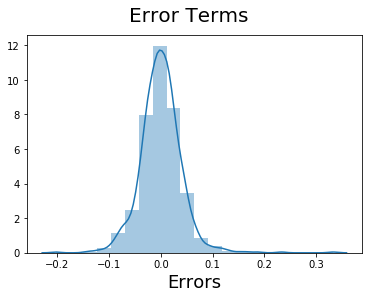

In [1612]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Making Predictions

In [1613]:
# Apply Scaler() to all the columns except dummy
num_vars = ['SalePrice','YrSold','MoSold','MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF','GarageArea','GarageYrBlt','GrLivArea','LowQualFinSF','2ndFlrSF','1stFlrSF','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','MasVnrArea','YearRemodAdd','YearBuilt','LotArea','LotFrontage']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Firepl

In [1614]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [1615]:
X_test.shape

(438, 306)

In [1616]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_new)

In [1617]:
X_test_lm.columns

Index(['const', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       '2ndFlrSF', 'OpenPorchSF', 'PoolArea', 'MSSubClass_90', 'MSZoning_RM',
       'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition2_PosN', 'BldgType_Twnhs', 'OverallQual_4', 'OverallQual_7',
       'OverallQual_8', 'OverallQual_9', 'OverallCond_3', 'OverallCond_7',
       'Exterior1st_BrkFace', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Po',
       'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'FullBath_3', 'KitchenAbvGr_2',
       'TotRmsAbvGrd_6', 'TotRmsAbvGrd_7', 'TotRmsAbvGrd_8', 'TotRmsAbvGrd_9',
       'TotRmsAbvGrd_10', 'TotRmsAbvGrd_11', 'TotRmsAbvGrd_12',
       'TotRmsAbvGrd_14', 'Functional_Sev', 'GarageCars_2', 'GarageCars_3',
       'PoolQC_Fa', 'PoolQC_Gd', 'SaleType_New'],
      dtype='object')

In [1618]:
# Making predictions
y_pred = lm.predict(X_test_lm)

# Model Evaluation

Text(0, 0.5, 'y_pred')

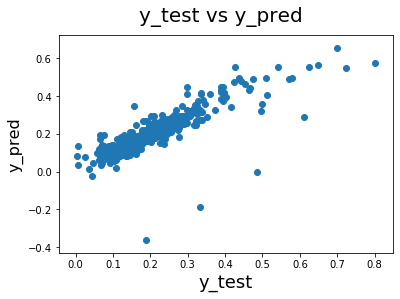

In [1619]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# Model Building and Evaluation

- Ridge and Lasso Regression

# Ridge Regression

In [1291]:
# list of alphas to tune
params = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}


ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train_new, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [1292]:
cv_results = pd.DataFrame(model_cv_ridge.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=25]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006721,0.007774,0.002005,0.001967,0.001,{'alpha': 0.001},0.794426,0.704466,0.752193,0.848922,0.851501,0.790302,0.056601,5,0.872546,0.867668,0.867756,0.862408,0.865018,0.867079,0.003369
1,0.002459,0.000343,0.000955,0.000170,0.01,{'alpha': 0.01},0.795130,0.704966,0.752436,0.848962,0.851384,0.790575,0.056411,4,0.872530,0.867665,0.867740,0.862390,0.864998,0.867065,0.003371
2,0.002904,0.000568,0.001086,0.000081,0.1,{'alpha': 0.1},0.799603,0.709505,0.754256,0.848905,0.849963,0.792446,0.054561,2,0.871446,0.867387,0.866724,0.861148,0.863641,0.866069,0.003498
3,0.002874,0.000175,0.001136,0.000006,1,{'alpha': 1.0},0.798835,0.732911,0.760405,0.843150,0.837949,0.794650,0.042963,1,0.854334,0.859571,0.853692,0.843655,0.844733,0.851197,0.006080
4,0.002807,0.000057,0.001107,0.000069,5,{'alpha': 5.0},0.788857,0.748008,0.772625,0.834116,0.817181,0.792157,0.030751,3,0.831445,0.839054,0.835089,0.821023,0.820562,0.829434,0.007457


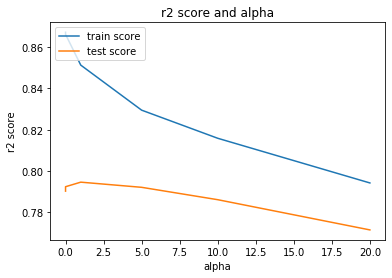

In [1293]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1294]:
# Checking the best parameter(Alpha value)
model_cv_ridge.best_params_

{'alpha': 1.0}

In [1295]:
alpha = 1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
ridge.coef_

array([ 0.10745519,  0.07119528,  0.14967825,  0.04135035,  0.02841093,
        0.04301117,  0.07385626, -0.02273549, -0.02333114,  0.01790989,
        0.04280698,  0.07114623,  0.03866577,  0.01672953,  0.03819166,
       -0.17662583, -0.01804115, -0.01763834,  0.02750642,  0.04947851,
        0.09289286, -0.04655671,  0.01220293,  0.03876616, -0.02925755,
       -0.04279817, -0.07432086,  0.0415143 ,  0.01913928,  0.09937614,
       -0.03084233,  0.01483202,  0.02952249,  0.04475635,  0.04742082,
        0.09888842,  0.0125165 ,  0.05266456,  0.06026655, -0.04703317,
        0.02149764,  0.06571516, -0.00819096, -0.21231786,  0.02548743])

In [1326]:

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_new,y_train)

y_train_pred = ridge.predict(X_train_new)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test_new)
print(r2_score(y_test,y_test_pred))

0.8486668536490575
0.7954108193116067


In [1327]:
model_parameter = list(ridge.coef_)
#model_parameter.insert(0,ridge.intercept_)
cols = X_train_new.columns
#cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [1329]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
2,BsmtFinSF1,0.149678
0,LotArea,0.107455
29,FullBath_3,0.099376
35,TotRmsAbvGrd_10,0.098888
20,OverallQual_9,0.092893
6,PoolArea,0.073856
1,MasVnrArea,0.071195
11,Neighborhood_NoRidge,0.071146
41,GarageCars_3,0.065715
38,TotRmsAbvGrd_14,0.060267


# doubling Alpha from 1.0 to 2.0

In [1308]:
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
ridge.coef_

array([ 0.08283599,  0.06665389,  0.12181861,  0.0387644 ,  0.0305023 ,
        0.0396999 ,  0.05145609, -0.02256807, -0.02493397,  0.0191305 ,
        0.04263606,  0.07119294,  0.03986079,  0.0156626 ,  0.03532594,
       -0.11103832, -0.01851137, -0.01839218,  0.02707977,  0.04979004,
        0.09125005, -0.04454395,  0.01224383,  0.0386123 , -0.02941811,
       -0.04226306, -0.05028752,  0.04285626,  0.02133107,  0.09587887,
       -0.02922979,  0.01363671,  0.02791562,  0.04299003,  0.04455321,
        0.09593361,  0.00666587,  0.04040511,  0.03878021, -0.03045842,
        0.02220163,  0.06764568,  0.00213383, -0.12145129,  0.02442279])

In [1322]:

ridge = Ridge(alpha=2.0)
ridge.fit(X_train_new,y_train)
ridge.coef_
y_train_pred = ridge.predict(X_train_new)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test_new)
print(r2_score(y_test,y_test_pred))

0.840187534152268
0.8038368277979708


In [1323]:
model_parameter = list(ridge.coef_)
#model_parameter.insert(0,ridge.intercept_)
cols = X_train_new.columns
#cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [1325]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
2,BsmtFinSF1,0.121819
35,TotRmsAbvGrd_10,0.095934
29,FullBath_3,0.095879
20,OverallQual_9,0.091250
0,LotArea,0.082836
11,Neighborhood_NoRidge,0.071193
41,GarageCars_3,0.067646
1,MasVnrArea,0.066654
6,PoolArea,0.051456
19,OverallQual_8,0.049790


# Lasso Regression

In [1298]:
hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv_lisso = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )


            

model_cv_lisso.fit(X_train_new, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [1299]:
cv_result_l = pd.DataFrame(model_cv_lisso.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005409,0.004536,0.001091,0.000112,0.001,{'alpha': 0.001},0.724893,0.699035,0.747561,0.775298,0.763078,0.741973,0.027286,1,0.779050,0.781390,0.786455,0.770542,0.767300,0.776947,0.007052
1,0.002817,0.000099,0.001137,0.000020,0.010,{'alpha': 0.01},0.410828,0.358739,0.447264,0.439515,0.396893,0.410648,0.031805,2,0.429699,0.415879,0.407393,0.420673,0.411009,0.416931,0.007800
2,0.002569,0.000164,0.000995,0.000123,0.100,{'alpha': 0.1},-0.012776,-0.008899,-0.000067,-0.003405,-0.003146,-0.005659,0.004557,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.002309,0.000167,0.000950,0.000045,1.000,{'alpha': 1.0},-0.012776,-0.008899,-0.000067,-0.003405,-0.003146,-0.005659,0.004557,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002095,0.000148,0.000846,0.000037,5.000,{'alpha': 5.0},-0.012776,-0.008899,-0.000067,-0.003405,-0.003146,-0.005659,0.004557,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


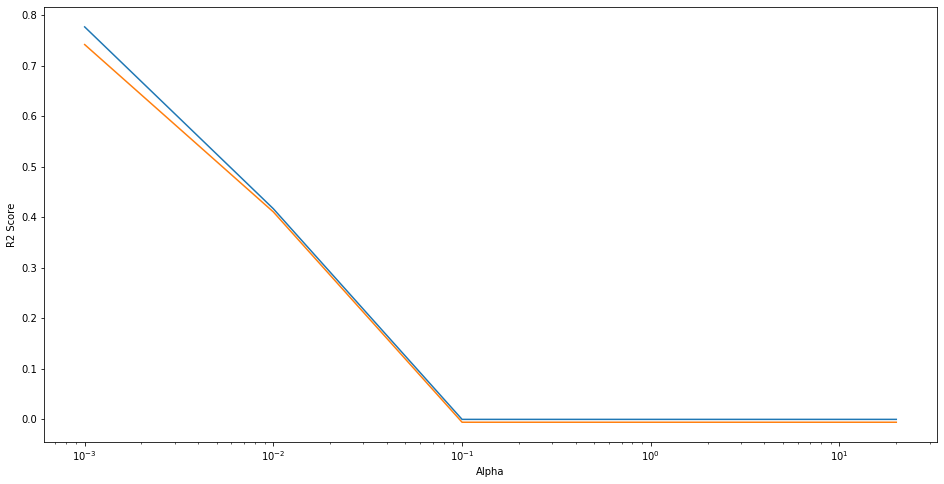

In [1300]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [1301]:
# Checking the best parameter(Alpha value)
model_cv_lisso.best_params_

{'alpha': 0.001}

In [1302]:
X_test_new.shape

(438, 45)

In [1338]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.7737276855769624
0.7458147346980282


In [1339]:

lasso.coef_

array([ 0.        ,  0.02723636,  0.00799922,  0.        ,  0.03711838,
        0.00916667,  0.        , -0.00663169, -0.03204542,  0.01433008,
        0.01979451,  0.05517775,  0.02889207,  0.        ,  0.        ,
       -0.        , -0.        , -0.02123066,  0.02269201,  0.0523519 ,
        0.07637911, -0.        ,  0.00481209,  0.0134943 , -0.02096911,
       -0.03855843, -0.        ,  0.04591962,  0.02846622,  0.07538845,
       -0.01480311,  0.        ,  0.00926776,  0.01873726,  0.01257444,
        0.06362428,  0.        ,  0.        ,  0.        , -0.        ,
        0.02365016,  0.09013401,  0.        , -0.        ,  0.01805524])

In [1340]:
model_parameter = list(lasso.coef_)
#model_parameter.insert(0,.intercept_)
cols = X_train_new.columns
#cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']

In [1341]:
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

,Feaure,Coef
41,GarageCars_3,0.090134
20,OverallQual_9,0.076379
29,FullBath_3,0.075388
35,TotRmsAbvGrd_10,0.063624
11,Neighborhood_NoRidge,0.055178


- Best Alpha for Lasso : 0.001 , with R2 Score Test : 0.74 , with R2 Score Train : 0.77
Lasso Top5 Vars : GarageCars_3 , OverallQual_9 , FullBath_3 , TotRmsAbvGrd_10 , Neighborhood_NoRidge
- Best Alpha for Ridge : 1.0 , with R2 Score Test : 0.79 , with R2 Score Train : 0.84
Ridge Top5 Vars : BsmtFinSF1, LotArea , FullBath_3 , TotRmsAbvGrd_10 , OverallQual_9

# doubling Alpha from 0.001 to 0.002

In [1333]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.70203350606392
0.6833175829313729


In [1334]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train_new,y_train)


Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1335]:

lasso.coef_


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.04151183,
        0.        ,  0.        , -0.        , -0.02998058,  0.00199644,
        0.        ,  0.03249929,  0.02286671,  0.        ,  0.        ,
       -0.        , -0.        , -0.01889009,  0.0152714 ,  0.04451974,
        0.04411748, -0.        ,  0.        ,  0.        , -0.00847909,
       -0.03623448, -0.        ,  0.04030197,  0.02947332,  0.04625026,
       -0.        , -0.        ,  0.        ,  0.00396993,  0.        ,
        0.03375358,  0.        ,  0.        ,  0.        , -0.        ,
        0.0194891 ,  0.10890597,  0.        , -0.        ,  0.00913421])

In [1336]:
model_parameter = list(lasso.coef_)
#model_parameter.insert(0,.intercept_)
cols = X_train_new.columns
#cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']

In [1337]:
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

,Feaure,Coef
41,GarageCars_3,0.108906
29,FullBath_3,0.046250
19,OverallQual_8,0.044520
20,OverallQual_9,0.044117
4,2ndFlrSF,0.041512


# Lasso Regression without Top5 vars identified

In [1348]:
X_train_lasso = X_train_new[X_train_new.columns.difference(['GarageCars_3' , 'OverallQual_9' , 'FullBath_3' , 'TotRmsAbvGrd_10' , 'Neighborhood_NoRidge'])]
    

In [1351]:
X_train_lasso.shape

(1021, 40)

In [1352]:
hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv_lisso = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )


            

model_cv_lisso.fit(X_train_lasso, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

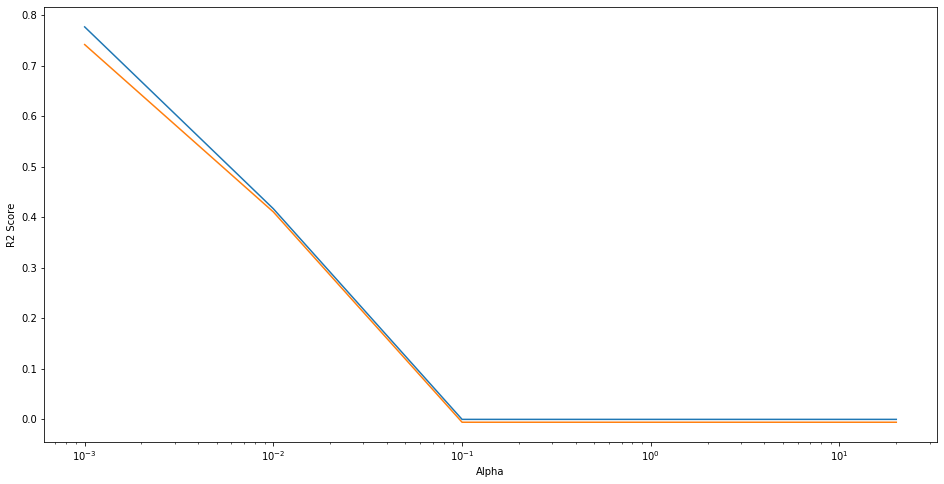

In [1353]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [1354]:
# Checking the best parameter(Alpha value)
model_cv_lisso.best_params_

{'alpha': 0.001}

In [1355]:
X_test_lasso = X_test_new[X_test_new.columns.difference(['GarageCars_3' , 'OverallQual_9' , 'FullBath_3' , 'TotRmsAbvGrd_10' , 'Neighborhood_NoRidge'])]

In [1356]:
X_test_lasso.shape


(438, 40)

In [1357]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_lasso,y_train)

y_train_pred = lasso.predict(X_train_lasso)
y_test_pred = lasso.predict(X_test_lasso)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.6734642787213858
0.654058750647008


In [1358]:
model_parameter = list(lasso.coef_)
#model_parameter.insert(0,.intercept_)
cols = X_train_lasso.columns
#cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']

In [1359]:
# top 5 predicter variables in lasso after removing first predicted varaibles

lasso_coef.sort_values(by='Coef',ascending=False).head(5)

,Feaure,Coef
18,MasVnrArea,0.109440
0,2ndFlrSF,0.096662
28,OverallQual_8,0.067668
20,Neighborhood_NridgHt,0.059302
3,BsmtExposure_Gd,0.057354
